In [1]:
import datetime as datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

plt.style.use('default') # haciendo los graficos un poco mas bonitos en matplotlib
#plt.rcParams['figure.figsize'] = (20, 10)

sns.set(style="whitegrid") # seteando tipo de grid en seaborn

In [23]:
avisos_detalle_df = pd.read_csv(r'C:\Users\Andres\Desktop\Organizacion de Datos\Datos Navant\fiuba_6_avisos_detalle.csv')
postulaciones_df = pd.read_csv(r'C:\Users\Andres\Desktop\Organizacion de Datos\Datos Navant\fiuba_4_postulaciones.csv')
vistas_df = pd.read_csv(r'C:\Users\Andres\Desktop\Organizacion de Datos\Datos Navant\fiuba_3_vistas.csv')
postulantes_edu_df = pd.read_csv(r'C:\Users\Andres\Desktop\Organizacion de Datos\Datos Navant\fiuba_1_postulantes_educacion.csv')
postulantes_gye_df = pd.read_csv(r'C:\Users\Andres\Desktop\Organizacion de Datos\Datos Navant\fiuba_2_postulantes_genero_y_edad.csv')

In [24]:
merge_postulantes_df = postulantes_edu_df.merge(postulantes_gye_df, on = 'idpostulante' )
postulantes_edu_df = 0
postulantes_gye_df = 0

In [10]:
merge_postulantes_df.count()#Hay nulos en algunas fechas de nacimiento

idpostulante       298231
nombre             298231
estado             298231
fechanacimiento    294668
sexo               298231
dtype: int64

In [16]:
postulaciones_detalles_df = postulaciones_df.merge(avisos_detalle_df, on ='idaviso')


In [19]:
vistas_df.rename(columns={'idAviso':'idaviso'}, inplace = True)

In [21]:
vistas_detalles_df = vistas_df.merge(avisos_detalle_df, on = 'idaviso')


In [22]:
vistas_detalles_df['timestamp'] = pd.to_datetime(vistas_detalles_df['timestamp'])
#vistas_detalles_df['timestamp'] = vistas_detalles_df['timestamp'].dt.hour

In [29]:
vistas_df['timestamp'] = pd.to_datetime(vistas_df['timestamp'])

In [38]:
postulaciones_df['fechapostulacion'] = pd.to_datetime(postulaciones_df['fechapostulacion'] )

In [37]:
postulaciones_df['fechapostulacion'].dt.month.value_counts()

2    2125425
1    1276198
Name: fechapostulacion, dtype: int64

In [50]:
vistas_df['timestamp'].dt.month.value_counts()

2    921074
3     40823
Name: timestamp, dtype: int64

In [51]:
vistas_df['timestamp'].dt.day.value_counts().sort_index()

1      40823
23     47236
24     95930
25     90646
26    227957
27    232145
28    227160
Name: timestamp, dtype: int64

In [52]:
postulaciones_filtradas_df = postulaciones_df[(postulaciones_df['fechapostulacion'].dt.month == 2 ) & ((postulaciones_df['fechapostulacion'].dt.day > 22) & ( postulaciones_df['fechapostulacion'].dt.day < 29)) ]

In [53]:
postulaciones_filtradas_df.count()

idaviso             539495
idpostulante        539495
fechapostulacion    539495
dtype: int64

In [54]:
vistas_df.count()

idAviso         961897
timestamp       961897
idpostulante    961897
dtype: int64

Text(0,0.5,'Cantidad')

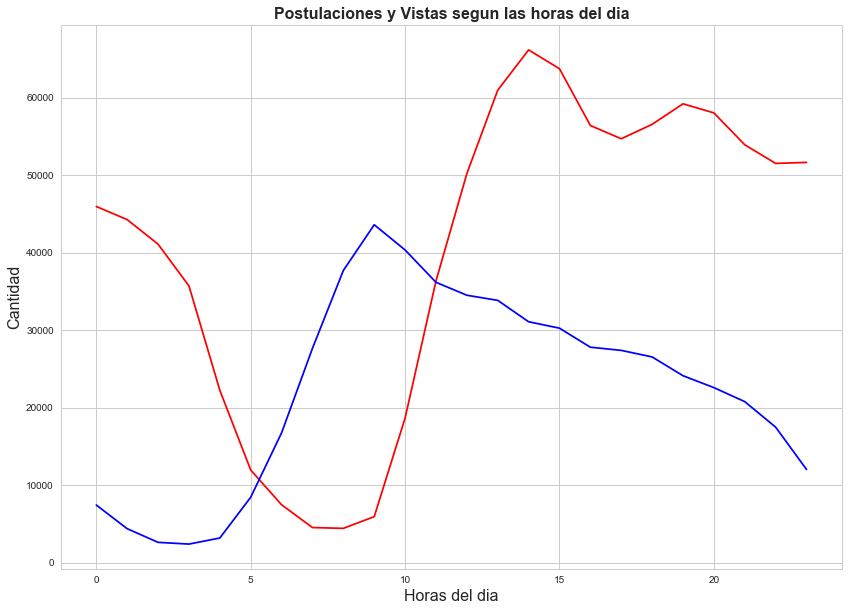

In [70]:
fig = plt.figure() #Creates a figure for the next plot, then disapears

ax = fig.add_subplot(111)#Form and background

plt.title('Postulaciones y Vistas segun las horas del dia',fontsize=16,fontweight='bold')

ax.set_xlabel('Horas del dia',fontsize=16)


vistas_df['timestamp'].dt.hour.value_counts().sort_index().plot(color='red')
postulaciones_filtradas_df['fechapostulacion'].dt.hour.value_counts().sort_index().plot(color='blue',figsize=(14,10))#Density plot
ax.set_ylabel('Cantidad',fontsize=16,)


Text(0,0.5,'Cantidad')

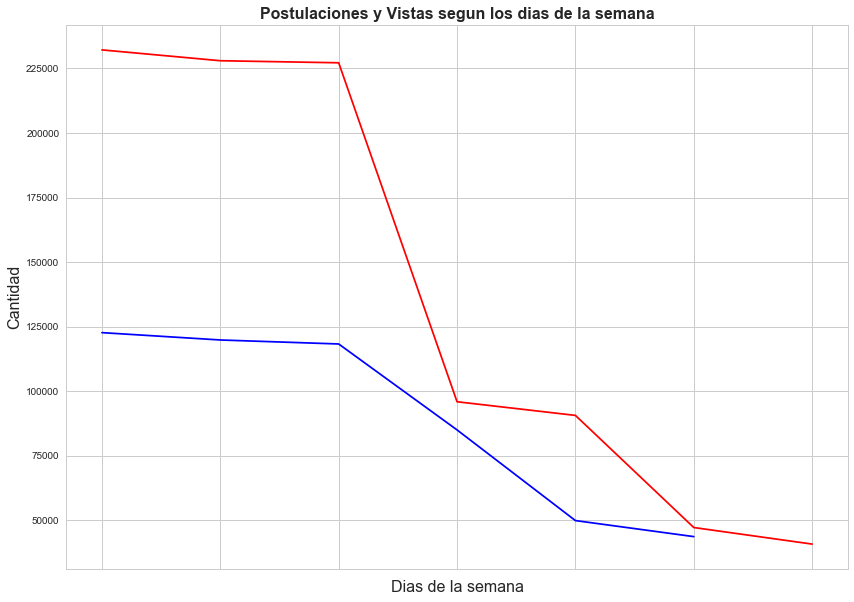

In [96]:
fig = plt.figure() #Creates a figure for the next plot, then disapears

ax = fig.add_subplot(111)#Form and background

plt.title('Postulaciones y Vistas segun los dias de la semana',fontsize=16,fontweight='bold')

ax.set_xlabel('Dias de la semana',fontsize=16)
##############################################################################
#FALTA ORDENAR LOS DIAS DE LA SEMANA, ESTE GRAFICO ASI COMO ESTA NO DICE NADA#
##############################################################################
vistas_df['timestamp'].dt.weekday_name.value_counts().plot(color='red')

postulaciones_filtradas_df['fechapostulacion'].dt.weekday_name.value_counts().plot(color='blue',figsize=(14,10))#Density plot
ax.set_ylabel('Cantidad',fontsize=16,)
